### Objective
Visualiza data

Give some insights, patterns or trends by group or by all data points
### Tools:
Numpy, Pandas, Matplotlib, Seaborn

In [126]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#Read the data and print out some rows
data = pd.read_csv('Cleaned_COVID_stats.csv', encoding='latin1')
data.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalCases_per_1M,Deaths_per_1M,TotalTests,Tests_per_1M,Population,Continent,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,USA,111820082,1219487.0,109814428.0,0.0,786167.0,940.0,333985.0,3642.0,1.186852e+09,3544901.0,3.348053e+08,North America,3.0,275.0,0.0,2348.0
1,India,45035393,533570.0,0.0,0.0,0.0,0.0,32016.0,379.0,9.358795e+08,665334.0,1.406632e+09,Asia,31.0,2636.0,2.0,0.4
2,France,40138560,167642.0,39970918.0,0.0,0.0,0.0,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,391.0,0.0,0.0
3,Germany,38828995,183027.0,38240600.0,0.0,405368.0,0.0,462891.0,2182.0,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,458.0,1.0,4833.0
4,Brazil,38743918,711380.0,36249161.0,0.0,1783377.0,0.0,179908.0,3303.0,6.377617e+07,296146.0,2.153536e+08,South America,6.0,303.0,3.0,8281.0


In [128]:
#Drop the last row which is the total row
data = data.drop(230)

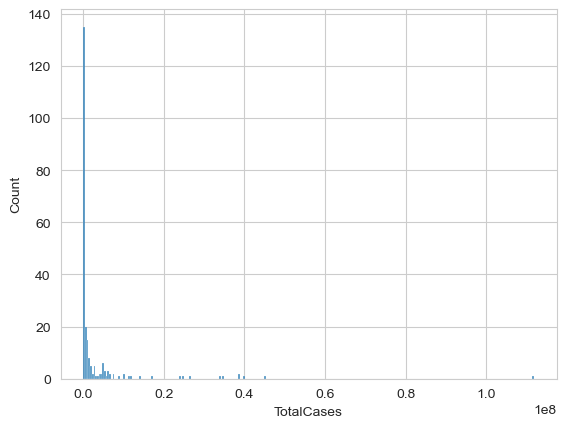

In [129]:
#Plot some distributions
sns.histplot(data = data, x = 'TotalCases')
plt.show()

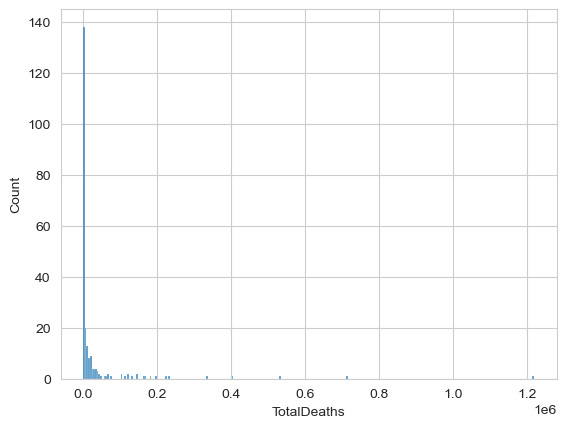

In [130]:
sns.histplot(data = data, x = 'TotalDeaths')
plt.show()

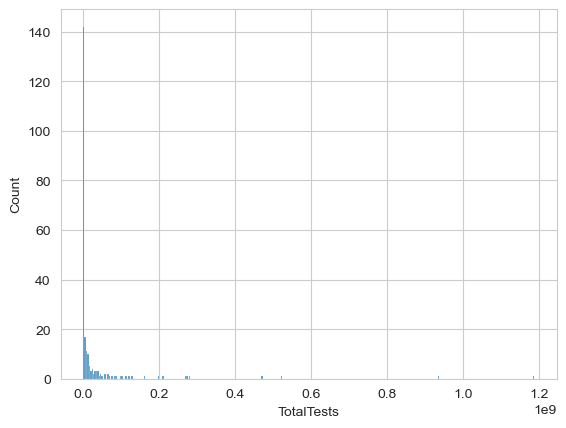

In [131]:
sns.histplot(data = data, x = 'TotalTests')
plt.show()

The graphs are very right-skewed, as suggested from the previous EDA

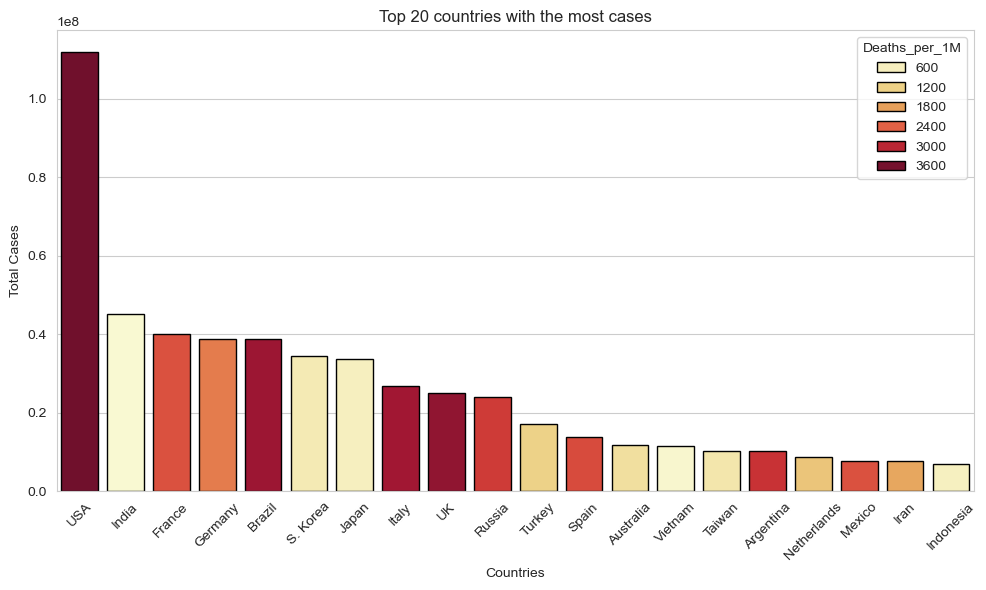

In [132]:
top_20 = data.nlargest(20, 'TotalCases')
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalCases', data=top_20, palette='YlOrRd',  hue = 'Deaths_per_1M', edgecolor='black')
plt.title('Top 20 countries with the most cases')
plt.ylabel('Total Cases')
plt.xlabel('Countries')
plt.xticks(rotation=45)  # Rotate x axis to make it more readable

# Show the chart
plt.tight_layout()
plt.show()

There is an outlier here, USA, has the most total cases, twice than the second place - India, which has more than 40M cases

USA also has the most deaths per 1M population

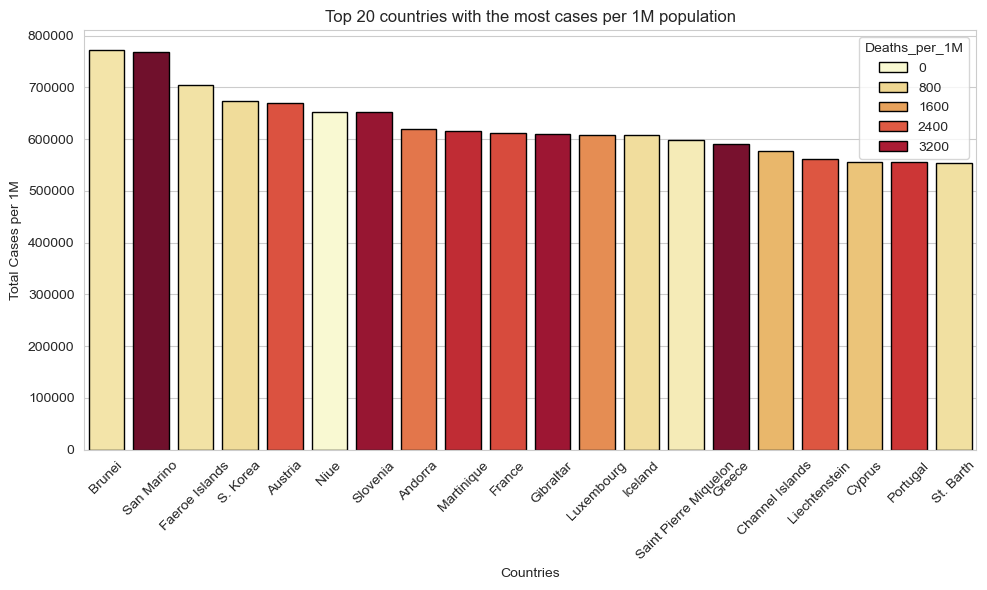

In [133]:
top_20 = data.nlargest(20, 'TotalCases_per_1M')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalCases_per_1M', data=top_20, palette='YlOrRd',  hue = 'Deaths_per_1M', edgecolor='black')
plt.title('Top 20 countries with the most cases per 1M population')
plt.ylabel('Total Cases per 1M')
plt.xlabel('Countries')
plt.xticks(rotation=45)  # Rotate x axis to make it more readable

# Show the chart
plt.tight_layout()
plt.show()

When it comes to the numbers of cases per 1M population the data values are much more similar among the top 20 countries

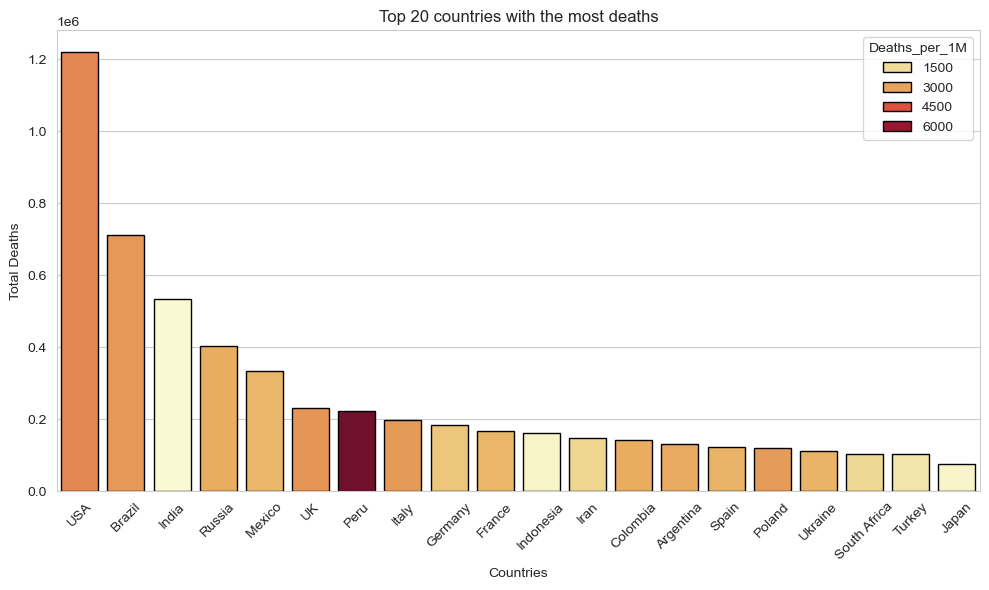

In [134]:
top_20 = data.nlargest(20, 'TotalDeaths')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='TotalDeaths', data=top_20, palette='YlOrRd',  hue = 'Deaths_per_1M', edgecolor='black')
plt.title('Top 20 countries with the most deaths')
plt.ylabel('Total Deaths')
plt.xlabel('Countries')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Show the chart
plt.tight_layout()
plt.show()

Several countries in the top 20 TotalCases list are still in top 20 deaths list, suggests a correlation between these two attributes

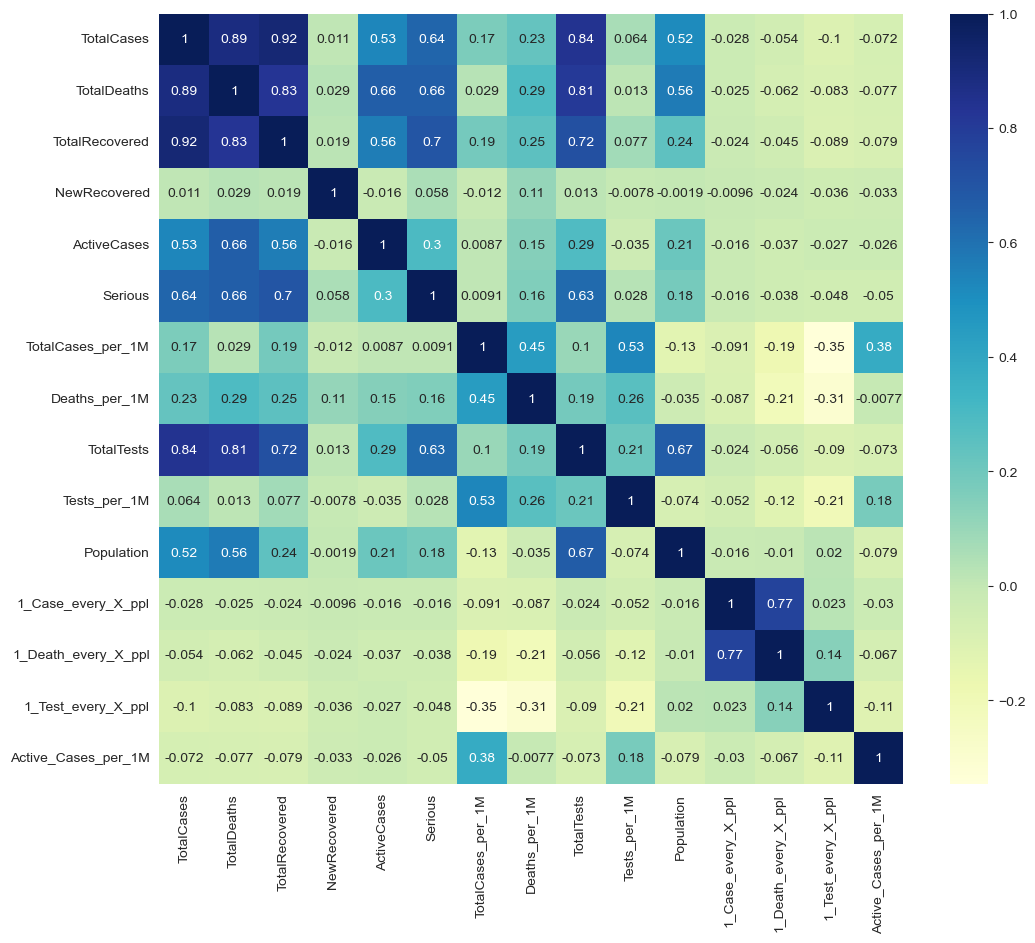

In [135]:
#Find correlations between attributes
plt.figure(figsize=(12, 10))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')

plt.show()

There is a high correlation between TotalCases and TotalDeaths, TotalRecovered and TotalTests, means that the more cases a country has, the more number of deaths, recovered cases and tests it has.

The correlation score of population and TotalCases is 0.52, suggests there is a correlation between them, but not very solid. When a country has greater population than the other one, there is a decent percent that which country with higher population will has high total cases.

The correlations score of TotalCases per 1M population with Total Cases and Total Deaths are just 0.17 and 0.029, means that there are not much correlation between these values

In [136]:
#Group the data by continent
continent_list_data = ['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America']
for i in range (len(continent_list_data)): 
    continent_list_data[i] = data.loc[data['Continent'] == continent_list_data[i]]



In [137]:

data_continent = {'Continent':['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America'], 
                'TotalCases':[]   ,        
                'TotalDeaths':[],   
                'TotalRecovered':[],     
                'NewRecovered':[],      
                'ActiveCases':[],       
                'Serious':[],                    
                'TotalTests':[],                
                'Population' :[],               
                }
data_continent_mean = {'Continent':['Asia', 'Europe', 'Africa', 'Australia/Oceania', 'South America', 'North America'], 
                        'TotalCases_per_1M':[], 
                        'Deaths_per_1M':[],
                        'Tests_per_1M':[],
                        '1_Case_every_X_ppl':[],
                        '1_Death_every_X_ppl':[],
                        '1_Test_every_X_ppl':[],
                        'Active_Cases_per_1M':[]
                    }
for i in range(6):
    for column in data_continent.keys():
        
        if column == 'Continent':
            continue
        data_continent[column].append(int(continent_list_data[i][column].sum()))
for i in range(6):
    for column in data_continent_mean.keys():
        
        if column == 'Continent':
            continue
        data_continent_mean[column].append(int(continent_list_data[i][column].mean()))
data_continent = pd.DataFrame(data_continent)
data_continent


,Continent,TotalCases,TotalDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,TotalTests,Population
0,Asia,220996963,1548390,108144976,0,1424087,370,2244652039,3262885383
1,Europe,253406198,2101824,235797174,474,875221,401,2848046702,747543837
2,Africa,12860924,258892,9211514,0,331499,389,111032578,1406728744
3,Australia/Oceania,14895771,33015,14615509,0,33714,6,91668192,43470408
4,South America,70200879,1367332,65935495,0,1999425,628,245395353,437694443
5,North America,131889132,1695941,126483239,350,1332790,1083,1325710449,598140916


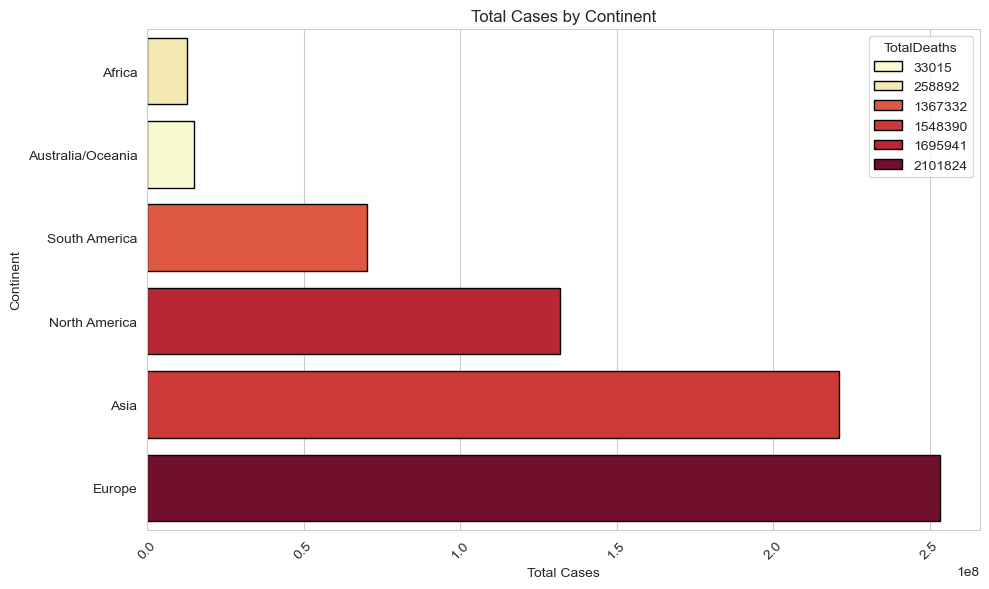

In [138]:
sns.set_style("whitegrid")

#Draw the bar
plt.figure(figsize=(10, 6))
sns.barplot(y='Continent', x='TotalCases', data=data_continent, palette='YlOrRd', order=data_continent.sort_values('TotalCases').Continent, hue = 'TotalDeaths', edgecolor='black')
plt.title('Total Cases by Continent')
plt.ylabel('Continent')
plt.xlabel('Total Cases')
plt.xticks(rotation=45)  # Rotate x axis

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

The number of total cases vary across the continent. Normally, the continent with higher number of cases will have higher number of deaths

In [139]:
#Another solution
#data.groupby('Continent')['Column_name'].sum() or data.groupby('Continent')['Column_name'].mean()
#Then make the DataFrame again


In [140]:
data_continent_mean = pd.DataFrame(data_continent_mean)
data_continent_mean

,Continent,TotalCases_per_1M,Deaths_per_1M,Tests_per_1M,1_Case_every_X_ppl,1_Death_every_X_ppl,1_Test_every_X_ppl,Active_Cases_per_1M
0,Asia,167982,718,1901375,97,12621,9,10120
1,Europe,399994,2697,4539232,3,469,0,31280
2,Africa,43286,319,188328,1424,36487,27,10151
3,Australia/Oceania,250161,485,1064661,18,5252,3,51858
4,South America,187173,2372,1002151,10,721,2,25667
5,North America,228463,1536,2610661,25,1970,3,71329


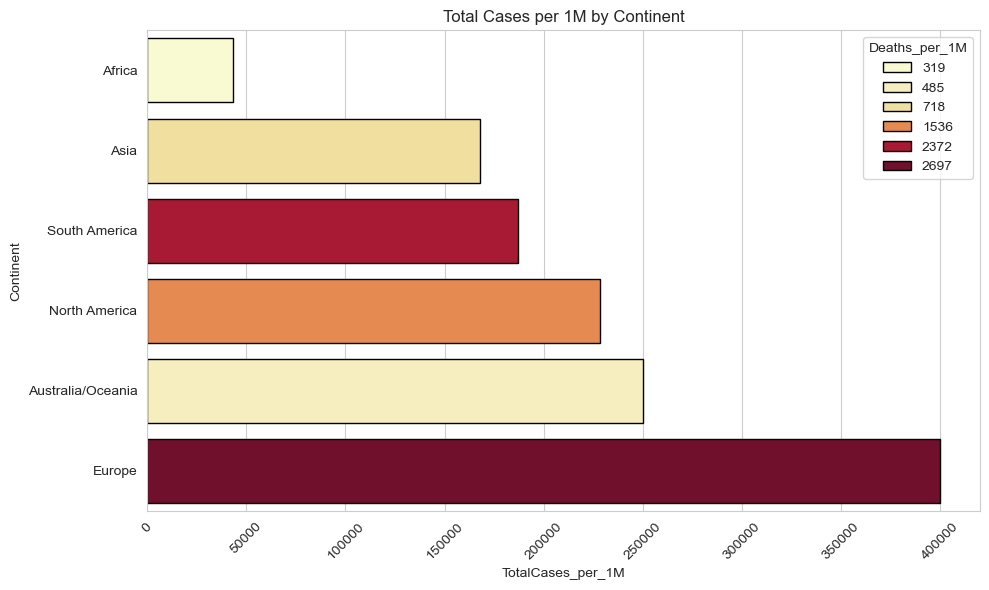

In [141]:
sns.set_style("whitegrid")

#Draw the bar
plt.figure(figsize=(10, 6))
sns.barplot(y='Continent', x='TotalCases_per_1M', data=data_continent_mean, palette='YlOrRd', order=data_continent_mean.sort_values('TotalCases_per_1M').Continent, hue = 'Deaths_per_1M', edgecolor='black')
plt.title('Total Cases per 1M by Continent')
plt.ylabel('Continent')
plt.xlabel('TotalCases_per_1M')
plt.xticks(rotation=45)  # Rotate x axis

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Europe has the most cases per 1M population and also the the most deaths per 1M population here, while surprisingly Africa has the least in both number of cases and deaths per 1M

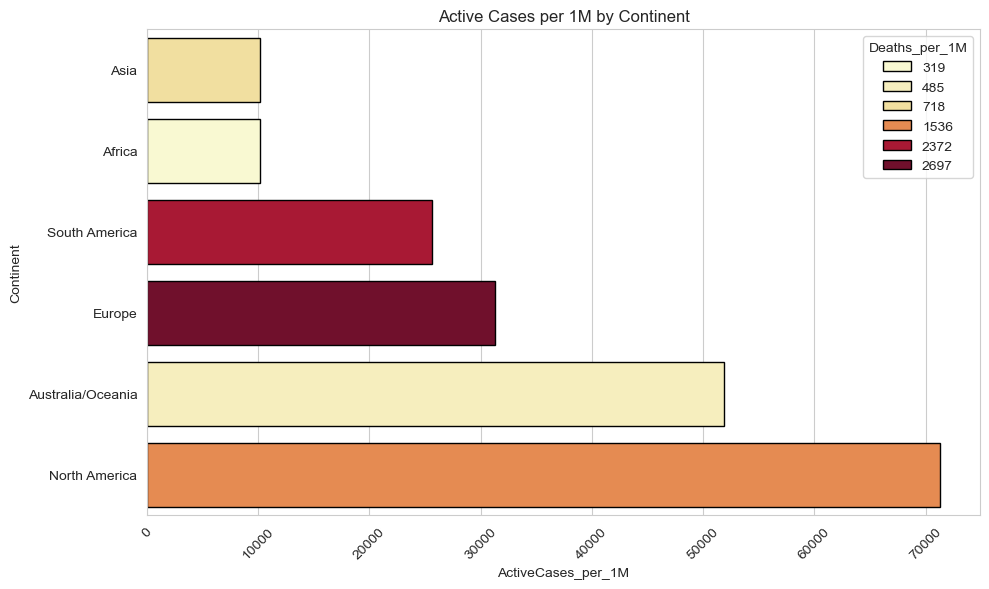

In [142]:
sns.set_style("whitegrid")

#Draw the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y='Continent', x='Active_Cases_per_1M', data=data_continent_mean, palette='YlOrRd', order=data_continent_mean.sort_values('Active_Cases_per_1M').Continent, hue = 'Deaths_per_1M', edgecolor='black')
plt.title('Active Cases per 1M by Continent')
plt.ylabel('Continent')
plt.xlabel('ActiveCases_per_1M')
plt.xticks(rotation=45)  # Rotate x axis

# Show the chart
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33932\3844801493.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Continent', x='ActiveCases', data=data_continent, palette='YlOrRd', order=data_continent.sort_values('ActiveCases').Continent, edgecolor='black')


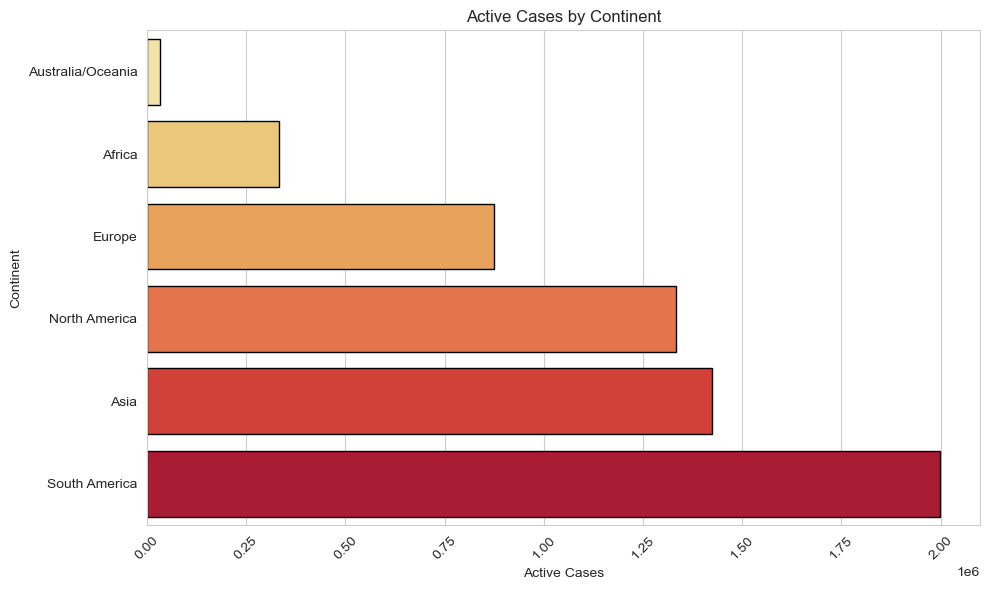

In [143]:
sns.set_style("whitegrid")

#Draw the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(y='Continent', x='ActiveCases', data=data_continent, palette='YlOrRd', order=data_continent.sort_values('ActiveCases').Continent, edgecolor='black')
plt.title('Active Cases by Continent')
plt.ylabel('Continent')
plt.xlabel('Active Cases')
plt.xticks(rotation=45)  # Rotate x axis

# Show the chart
plt.tight_layout()
plt.show()

While Europe has the most cases, America has the very high number of Active Cases and Active Cases per 1M.

### Conclusion
The number of every attributes vary widely across countries and continents


This project provides insightful information about the varied effects of the pandemic, highlighting the significance of customized approaches. 

As we continue to navigate the complexities of the COVID-19 pandemic and prepare for future health crises, the skills and insights gained from this project serve as a valuable resource for informed decision-making and data-driven solutions.

